<h1> Importing Important and Needed Moduls

In [1]:
from fastai import *
from fastai.imports import *
from fastai.vision.all import *
from fastai.metrics import error_rate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pickle
import cv2

import os
for dirname, _, filenames in os.walk('/AIStuff/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<h1> Importing Dataset for Text

In [2]:
# Importing Text Dataset

data = '../AIStuff/data/dog_breeds.csv'

df = pd.read_csv(data, header=None, low_memory=False)

<h1>Random Forest Classifier</h1>

In [41]:
#reviewing text data
col_names = ['Breed', 'Country of Origin', 'Fur Color', 'Height', 'Color of Eyes','Longevity', 'Common Traits', 'Common Health Problems']


df.columns = col_names

col_names
df = df.drop([0], axis = 0)
df.head(1000)

,Breed,Country of Origin,Fur Color,Height,Color of Eyes,Longevity,Common Traits,Common Health Problems
1,Labrador Retriever,Canada,"Yellow, Black, Chocolate",21-24,Brown,10-12,"Loyal, friendly, intelligent, energetic, good-natured","Hip dysplasia, obesity, ear infections"
2,German Shepherd,Germany,"Black, Tan",22-26,Brown,7-10,"Loyal, intelligent, protective, confident, trainable","Hip dysplasia, elbow dysplasia, pancreatitis"
3,Bulldog,England,"White, Red",12-16,Brown,8-10,"Loyal, calm, gentle, brave","Skin allergies, respiratory issues, obesity"
4,Poodle,France,"White, Black, Brown, Apricot",10-15,"Brown, Blue",12-15,"Intelligent, active, affectionate, hypoallergenic","Hip dysplasia, epilepsy, bladder stones"
5,Beagle,England,"White, Tan, Red, Lemon",13-15,Brown,12-15,"Curious, friendly, energetic, good-natured","Ear infections, hip dysplasia, epilepsy"
6,Chihuahua,Mexico,"Black, Brown, Tan, White",6-9,"Brown, Blue",12-20,"Loyal, energetic, confident, sensitive","Dental problems, eye issues, respiratory issues"
7,Boxer,Germany,"Fawn, Brindle",21-25,Brown,10-12,"Loyal, energetic, intelligent, playful, protective","Hip dysplasia, cancer, heart conditions"
8,Golden Retriever,Scotland,Golden,21-24,Brown,10-12,"Intelligent, friendly, kind, loyal, good-natured","Hip dysplasia, cancer, skin allergies"
9,Pug,China,"Fawn, Black",10-14,Brown,12-15,"Loyal, playful, affectionate, social, charming","Eye problems, respiratory issues, obesity"
10,Rottweiler,Germany,"Black, Tan",22-27,Brown,8-10,"Loyal, protective, confident, strong","Hip dysplasia, cancer, elbow dysplasia"


In [42]:
# Remove any rows with missing values
df = df.dropna()

<h1> Declare feature vector and target variable

In [43]:
# Extract the features and labels
X = df.drop('Breed', axis=1)
y = df['Breed']

X.head()

,Country of Origin,Fur Color,Height,Color of Eyes,Longevity,Common Traits,Common Health Problems
1,Canada,"Yellow, Black, Chocolate",21-24,Brown,10-12,"Loyal, friendly, intelligent, energetic, good-natured","Hip dysplasia, obesity, ear infections"
2,Germany,"Black, Tan",22-26,Brown,7-10,"Loyal, intelligent, protective, confident, trainable","Hip dysplasia, elbow dysplasia, pancreatitis"
3,England,"White, Red",12-16,Brown,8-10,"Loyal, calm, gentle, brave","Skin allergies, respiratory issues, obesity"
4,France,"White, Black, Brown, Apricot",10-15,"Brown, Blue",12-15,"Intelligent, active, affectionate, hypoallergenic","Hip dysplasia, epilepsy, bladder stones"
5,England,"White, Tan, Red, Lemon",13-15,Brown,12-15,"Curious, friendly, energetic, good-natured","Ear infections, hip dysplasia, epilepsy"


<h1> Training and Testing Model

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<h1> Checking out the shape of Train and Testing

In [45]:
X_train.shape, X_test.shape

((235, 7), (116, 7))

<h1> Importing Category Encoders for label encoding

In [46]:
import category_encoders as ce

<h1> Label encoding

In [47]:
encoder = ce.OrdinalEncoder(cols=['Country of Origin', 'Fur Color', 'Height', 'Color of Eyes', 'Longevity', 'Common Traits', 'Common Health Problems'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

<h1> View the encoded variables

In [48]:
em = encoder.mapping
pd.set_option('display.max_rows', None)
print(em)

[{'col': 'Country of Origin', 'mapping': Hungary           1
Malta             2
Belgium           3
China             4
Australia         5
Germany           6
England           7
Congo             8
France            9
Wales            10
Japan            11
Russia           12
United States    13
Scotland         14
Mexico           15
Italy            16
Ireland          17
Rhodesia         18
Canada           19
Finland          20
Switzerland      21
Middle East      22
Turkey           23
Netherlands      24
Madagascar       25
Africa           26
NaN              -2
dtype: int64, 'data_type': dtype('O')}, {'col': 'Fur Color', 'mapping': Red                              1
White                            2
Fawn, Mahogany                   3
Pink, White, Black               4
Red, Black                       5
Silver, Grey                     6
White, Black, Red                7
Red, Black & White               8
Cream, Fawn                      9
Black, Tan                      

<h1> Classifying Test with Every available to use parameter

In [11]:
from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

clf = RandomForestClassifier(random_state=42)



# fit the model

clf.fit(X_train, y_train)



# Predict the Test set results

y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9401709401709402


<h1> Checking out the feature scores of each variable

In [12]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Height                    0.237979
Fur Color                 0.217601
Country of Origin         0.176076
Longevity                 0.122578
Common Health Problems    0.118473
Common Traits             0.109506
Color of Eyes             0.017788
dtype: float64

<h1>  Visualizing Important Features to get rid of the unimportant one

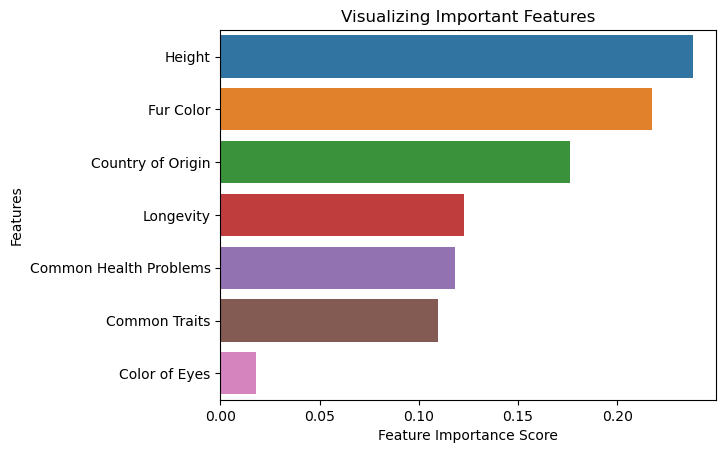

In [13]:
sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()


<h1> Dropping Color of Eyes parameter

In [14]:
X = df.drop(['Breed', 'Color of Eyes'], axis=1)

y = df['Breed']

<h1> Re-split for train and test without Color of Eyes parameter

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

<h1> Re-Encode the columns with taking out color of eyes

In [16]:
encoder = ce.OrdinalEncoder(cols=['Country of Origin', 'Fur Color', 'Height', 'Longevity', 'Common Traits', 'Common Health Problems'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

<h1> Classifying without Color of Eyes Perimeter

In [17]:
clf = RandomForestClassifier(random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score with Color of Eyes variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with Color of Eyes variable removed : 0.9402


<h1> Showing Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]


<h1> Classification Reports

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                                   precision    recall  f1-score   support

                    Affenpinscher       1.00      1.00      1.00         1
                        Africanis       1.00      1.00      1.00         1
                            Akita       1.00      1.00      1.00         1
              American Eskimo Dog       1.00      1.00      1.00         2
               Anatolian Shepherd       1.00      1.00      1.00         2
            Australian Cattle Dog       1.00      1.00      1.00         1
                Australian Kelpie       0.33      1.00      0.50         1
              Australian Shepherd       1.00      1.00      1.00         6
Australian Stumpy Tail Cattle Dog       0.00      0.00      0.00         2
               Australian Terrier       1.00      1.00      1.00         1
                          Basenji       1.00      1.00      1.00         1
                     Basset Hound       1.00      1.00      1.00         2
                        

C:\Users\theen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\theen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\theen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\theen\anaconda3\lib\site-packages\sklearn\metrics\_cla

<h1> Pickle Files for Web Deployment (Flask)

In [21]:
# Save the trained model as a pickle file
with open("dog_breeds_dataset.pkl", "wb") as file:
    pickle.dump(clf, file)

# Save the label encoder as a pickle file
label_encoder = LabelEncoder()
label_encoder.fit(y)
with open("label_encoder.pkl", "wb") as file:
    pickle.dump(label_encoder, file)

<h1> Image Classification (CNN)
     Searching and defining path

In [22]:
# path for image training
x  = '../AIStuff/training/training'
path = Path(x)
path.ls()

(#7) [Path('../AIStuff/training/training/beagle'),Path('../AIStuff/training/training/bulldog'),Path('../AIStuff/training/training/german-shepherd'),Path('../AIStuff/training/training/husky'),Path('../AIStuff/training/training/labrador-retriever'),Path('../AIStuff/training/training/poodle'),Path('../AIStuff/training/training/rottweiler')]

<h1> Image loading and formatting

In [23]:
#data loading (image)

np.random.seed(40)
batch_tfms =[*aug_transforms(), Normalize(*imagenet_stats)]
data = ImageDataLoaders.from_folder(path, train = '.', valid_pct=0.2,
                                    ds_tfms=batch_tfms,num_workers=4, item_tfms=Resize(224))

C:\Users\theen\anaconda3\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


<h1> Showing the loaded image

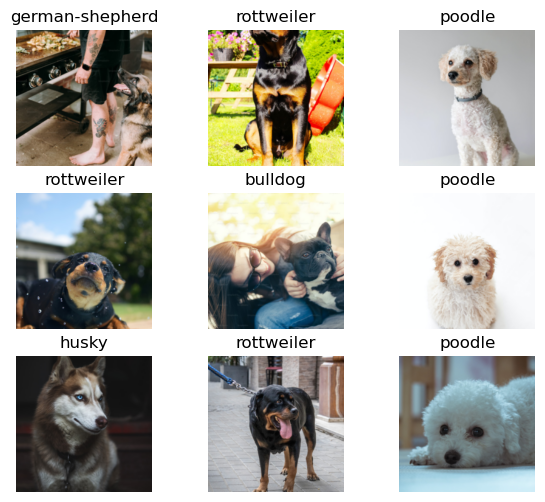

In [24]:
data.show_batch(nrows=3, figsize=(7,6))

<h1> Looking for the amount of class

In [25]:
data.c

7

<h1> Creating Model

In [26]:
learn = vision_learner(data, models.resnet18, metrics=[accuracy], model_dir = Path('../kaggle/working'),path = Path("."))

<h1> Finding LR

SuggestedLRs(valley=0.0004786300996784121)

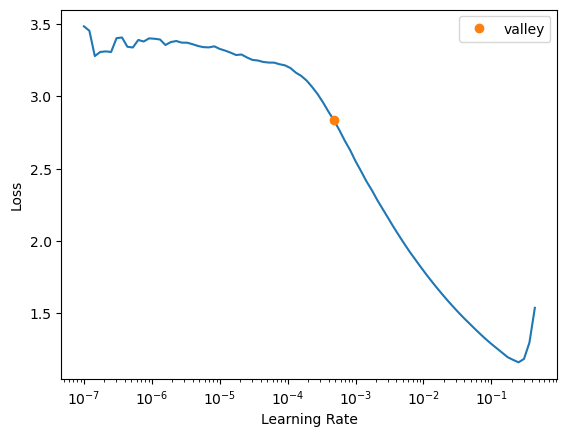

In [27]:
learn.lr_find()

<h1> Train Model

In [28]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(40,slice(lr1,lr2))

epoch,train_loss,valid_loss,None,time


TypeError: Exception occured in `Recorder` when calling event `after_batch`:
	'numpy.float64' object is not callable

<h1> Interpret Result

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(6,figsize = (25,5))

<h1> Prediction Using Training Model

In [37]:
img = load_image('../AIStuff/training/training/poodle/poodle11.jpg')
print(learn.predict(img)[0])

poodle


<h1> Save and Load Model

In [ ]:
learn.export()

In [36]:
learn_inf = load_learner('export.pkl')
img = load_image('../AIStuff/training/training/rottweiler/rottweiler4.jpg')
print(learn_inf.predict(img)[0])

rottweiler


In [40]:
img = load_image('../AIStuff/training/training/rottweiler/rottweiler26.jpg')
learn_inf.predict(img)[0]

'rottweiler'